# Data Analysis on Alzheimer's and Neuropsych Bot

In this project, I am anaylzing and plotting data from an Alzheimer's dataset where I am looking to consider of the question of what variables have the strongest relationship between them through the use of a variety of bargraphs and Pearson's correlation. I am trying to find find which variables have the strongest realtionship when it comes to preedicting cogntive function and risk for dementia or Alzheimer's disease so that I can create a chatbot that evaluates one's cogntiive functioning as far as memory goes. There are two parts to my project. One has to do with the actual data anaylsis and plotting for Alzheimer's disease and variables that factor into it the most. The other part of my project has to do with using the plots and data anaylsis in a way where I translate it to chatbot so that the chatbot can interpret and evaluate a user's cognitive functioning based on the most prominent variables from the dataset.



Note that projects should be self-sufficient, so make sure to provide enough information and context here for someone to understand what you are doing in your project, and why. 

## Project Code

If it makes sense for your project, you can have code and outputs here in the notebook as well.

In [1]:
from my_module.functions import want_cognitive_advice,cognitive_function_advice, want_brain_volume, interpreting_brain_volume, want_CDR, find_CDR, have_appointment


In [2]:
have_appointment()

Do you want to know your brain volume (yes/no)?yes
What is your age?: 19
Your brain volume is 0.859
This means 85.9% of your cranial space is brain tissue
Based on your brain volume, your brain is functioning in a healthy manner
Do you want to learn your Clinical Dementia Rating (CDR)on the basis of your brain volume (yes/no)?yes
Please input your given brain volume (the one in float form): 0.859
Your CDR is -1.461
Your healthy brain volume and CDR indicates that there exists no signs of clinical dementia, which is good
Do you want to get helpful advice based on your stage of cogntive functioning (yes/no)?: yes
0.89814765
To sustain your healthy cognitive functioning, you should keep learning new things. Learn a new skill like doing a puzzle, learn a language. Anything to keep the neurons in your brain firing and making new connections. Keep up the good work.
Thank you for attending this appointment, that would be $200 please


## Display of the Dataset using Pandas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from scipy.stats import pearsonr

Down below is the dataset that revolves around the different aspects of Alziehemer's disease


In [14]:
df= pd.read_table("Alziehemer's data.txt", delimiter = '\t')
df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,ID,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,ID,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,ID,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,ID,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010
...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390


In [15]:
# Replacing missing values in the dataframe with the number 0 in order to help clean the datavfor analysis
df= df.replace('nan',0)
df
df.dropna(inplace=True)
df

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,ID,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,ID,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,ID,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,F,R,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,OAS1_0454_MR1,F,R,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,OAS1_0455_MR1,F,R,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


In [4]:
df.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,72.444444,3.231481,2.490741,27.324074,0.261574,1458.638889,0.750500,1.217176
std,12.306424,1.333689,1.120593,3.436680,0.382593,160.523125,0.048271,0.128858
min,33.000000,1.000000,1.000000,15.000000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.000000,0.000000,1346.000000,0.715000,1.141750
50%,73.000000,3.000000,2.000000,29.000000,0.000000,1445.500000,0.748500,1.214500
75%,81.000000,4.000000,3.000000,30.000000,0.500000,1536.500000,0.786000,1.304000
max,96.000000,5.000000,5.000000,30.000000,2.000000,1992.000000,0.841000,1.563000


 ## Dataset Plotted through Seaborn

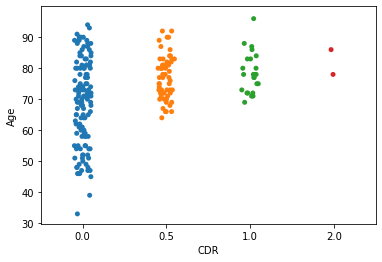

In [5]:
sns.stripplot(x='CDR',y='Age', data=df)

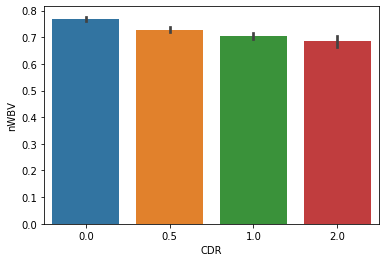

In [6]:
sns.barplot(x='CDR', y='nWBV', data=df)

This barplot shows that there is a relationship between Clinical Dementia Rating (CDR) and brain volume (nWBV) in the sense that as the Clinical Dementia Rating increases (chance for dementia and cognitive inpairment becomes more severe) the brain volume tends to decrease. I use this given information and translate it into my chatbot through creating a linear regression equation down below for CDR and nWBV that predicts the CDR based on one's given brain volume (nWBV).

## Statistical Analysis (Correlation) through Scatterplot and Linear Regression Plot

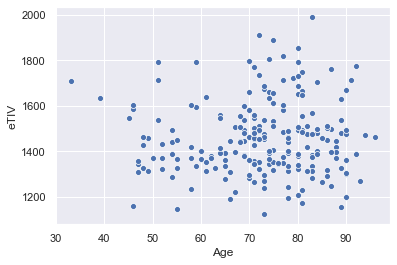

In [7]:
sns.set()
%matplotlib inline
sns.scatterplot(x='Age',y= 'eTIV',data=df)

Based on this scatterplot, there is no correlation between age and eTIV (Estimated Total Intracranial Volume)

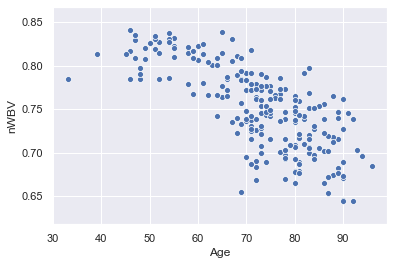

In [8]:
sns.set()
%matplotlib inline
sns.scatterplot(x='Age',y= 'nWBV',data=df)

There seems to be a negative correlation between age and nWBV (brain volume), meaning that has age increases, brain volume decreases. I use this relationship between age and brain volume to create a linear regression equation in order to use the equation into one of my functions for my chatbot

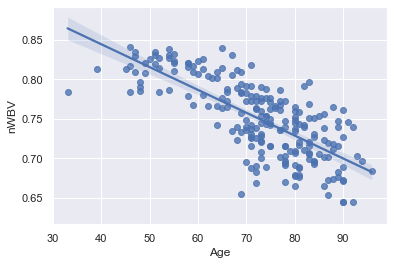

In [9]:
sns.set()
%matplotlib inline
sns.regplot(x='Age',y='nWBV',data=df)

In [10]:
# This code has been inspired by a tutorial about linear regression equation using Skikit-Learn 
#(https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
X = df['Age'].values.reshape(-1,1)
y = df['nWBV'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
y_test_flatten = y_test.flatten()
y_pred_flatten = y_pred.flatten()
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df
pearsonr(df['Actual'],df['Predicted'])

[0.95962137]
[[-0.00288664]]


(0.6804083309767157, 3.752919436783581e-07)

- Based on the Pearson's Correlation, there exists a moderately strong, negative correlation between age and brain volume (nWBV), r(414) = 0.68, p < .001



In [12]:
# Linear Regression Equation for ChatBot in regards to brain volume (nWBV)  
Y = (-0.00207326)*(X)+0.89814765

In [16]:
# This code has been inspired by a tutorial about linear regression equation using Skikit-Learn 
#(https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
X = df['CDR'].values.reshape(-1,1)
y = df['nWBV'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

[0.76697562]
[[-0.06298643]]


,Actual,Predicted
0,0.773,0.735482
1,0.823,0.766976
2,0.797,0.766976
3,0.839,0.766976
4,0.700,0.766976
5,0.712,0.766976
6,0.692,0.735482
7,0.738,0.735482
8,0.679,0.766976
9,0.766,0.766976


In [ ]:
# Equation to find the CDR based on its linear regression equation
Y = (X-0.76697562)/-0.06298643 

# Extra Credit (Optional)

I have never done Python or any other coding language before so this is my first time learning a coding langauge. This is my first time experimenting with packages and modules within this notebook that deal with data visualization (matplotlib, seaborn, pandas, etc). I taught myself how to use packages like pandas and seaborn with the guide of YouTube videos, learned how to use the package "sklearn" to create a linear regression equation through an online tutorial, and learned how to create a Pearson's correlation through the likes of scipy documentation.